In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/test.csv')

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
# 데이터의 컬럼 살펴보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
survived_rate = train.Survived.mean() * 100
print('생존율 :',round(survived_rate,1),'%')

생존율 : 38.4 %


In [7]:
# 생존자 : 342명, 사망자 : 549명
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# 실습하기
# 성별에 따른 생존자의 수를 구해주세요
train.loc[train.Survived==1,:].Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [9]:
# 실습하기
# 성별에 따른 사망자의 수를 구해주세요
train.loc[train.Survived==0, : ].Sex.value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [10]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
# train만 embarked에는 2개가 비어있는데 거의다 S니까 그냥 S로 바꿔준다
train['Embarked'].fillna('S', inplace=True)

In [14]:
train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

In [15]:
train["Pclass_1"] = train["Pclass"] == 1
train["Pclass_2"] = train["Pclass"] == 2
train["Pclass_3"] = train["Pclass"] == 3

test["Pclass_1"] = test["Pclass"] == 1
test["Pclass_2"] = test["Pclass"] == 2
test["Pclass_3"] = test["Pclass"] == 3

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Embarked_C       0
Embarked_S       0
Embarked_Q       0
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64

In [17]:
# test에만 Fare가 1개 비어있는데 1개 정도는 중간값으로 넣어준다
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [18]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Embarked_C       0
Embarked_S       0
Embarked_Q       0
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64

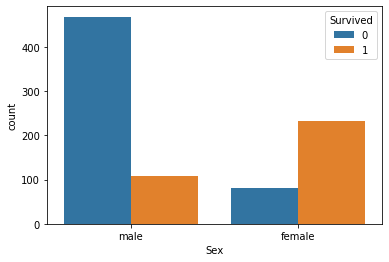

In [19]:
sns.countplot(data=train,x='Sex', hue='Survived')

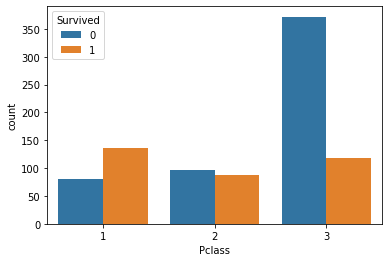

In [20]:
sns.countplot(x="Pclass", hue="Survived", data=train)

In [21]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
train.loc[train.Survived==0, : ].Pclass.value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [23]:
# 필요없는 컬럼 삭제
train = train.drop(['Cabin'],axis=1)
test = test.drop(['Cabin'],axis=1)

In [24]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.001205,0.022204,-0.033606,0.034303,-0.000086,-0.029486
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.168240,-0.149683,0.003650,0.285904,0.093349,-0.322308
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.074053,0.221009,-0.885924,-0.188432,0.916673
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.023233,-0.022405,0.348941,0.006954,-0.312271
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.059528,0.068734,-0.026354,-0.054582,-0.055932,0.092548
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.011069,0.060814,-0.081228,-0.017633,-0.000734,0.015790
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.269335,-0.162184,-0.117216,0.591711,-0.118557,-0.413333
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.782742,-0.148258,0.296423,-0.125416,-0.153329
Embarked_S,0.022204,-0.149683,0.074053,-0.023233,0.068734,0.060814,-0.162184,-0.782742,1.000000,-0.499421,-0.161921,0.189980,-0.015104
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,-0.499421,1.000000,-0.155342,-0.127301,0.237449


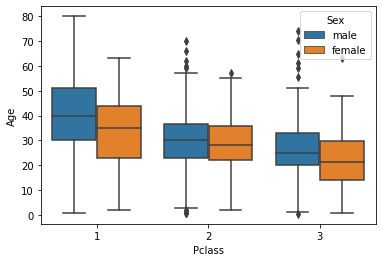

In [25]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train)

In [26]:
sns.lmplot(data=low_fare, x='Age', y='Pclass', hue='Survived')

NameError: name 'low_fare' is not defined

In [ ]:
low_fare = train.loc[train.Fare <100,:]
sns.lmplot(data=low_fare, x='Age', y='Fare', hue='Survived')

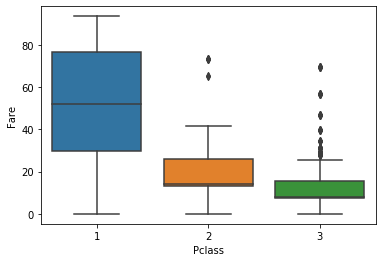

In [27]:
low_fare = train.loc[train.Fare <100,:]

sns.boxplot(x='Pclass', y='Fare', data=low_fare)

In [28]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Embarked_C       0
Embarked_S       0
Embarked_Q       0
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64

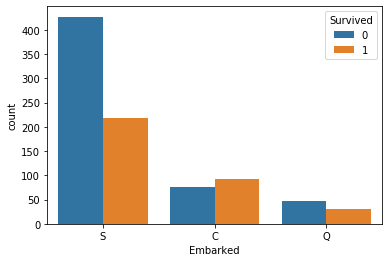

In [29]:
sns.countplot(data=train,x='Embarked',hue='Survived')
# 탑승 항구 별 생존

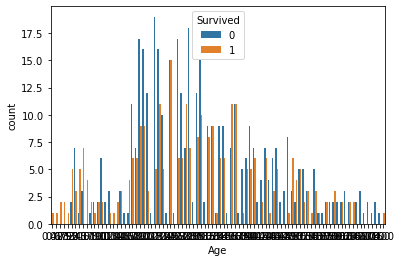

In [30]:
sns.countplot(data=train,x='Age', hue='Survived')

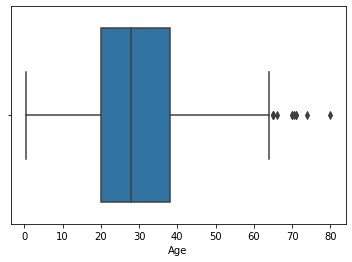

In [31]:
sns.boxplot(x='Age', hue='Survived', data=train)

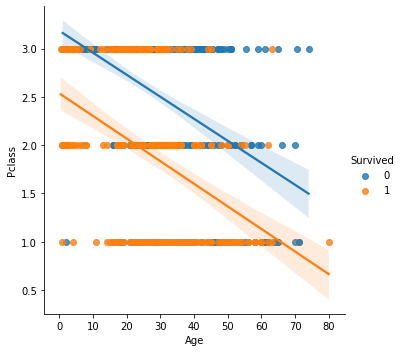

In [32]:
sns.lmplot(data=train, x='Age', y='Pclass', hue='Survived')

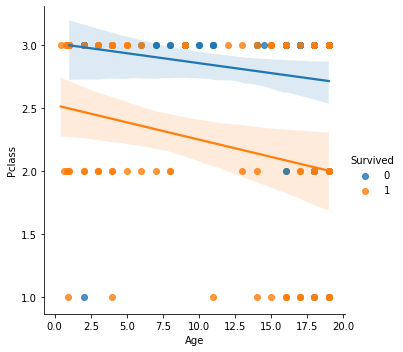

In [33]:
low_age = train.loc[train.Age <20,:]
sns.lmplot(data=low_age, x='Age', y='Pclass', hue='Survived')

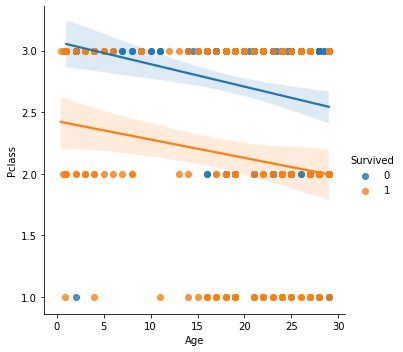

In [34]:
low_age = train.loc[train.Age <30,:]
sns.lmplot(data=low_age, x='Age', y='Pclass', hue='Survived')

In [35]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Embarked_C      0
Embarked_S      0
Embarked_Q      0
Pclass_1        0
Pclass_2        0
Pclass_3        0
dtype: int64

In [36]:
# Name에서 이름에서 Mr., Miss., Mrs., 나머지를 나타내는 것만 뽑아서 Title에 넣음
train['Title'] = train['Name'].str.extract('([A-za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract('([A-za-z]+)\.', expand=False)

In [37]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Capt          1
Ms            1
Lady          1
Don           1
Countess      1
Sir           1
Mme           1
Name: Title, dtype: int64

In [38]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [39]:
#  Mr : 0, Miss : 1, Mrs : 2, 나머지 : 3으로 바꿔줌
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, 
                 'Master':3, 'Dr':3, 'Rev':3, 'Col':3, 'Mlle':3, 'Major':3, 'Mme':3, 'Don':3, 'Jonkheer':3, 'Ms':3,
                 'Countess':3, 'Capt':3, 'Lady':3, 'Sir':3 }

train['Title'] = train['Title'].map(title_mapping)

test_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                'Master':21, 'Rev':2, 'Col':2, 'Dona':1, 'Ms':1, 'Dr':1}
                
test['Title'] = test['Title'].map(test_mapping)

In [ ]:
train.groupby

In [41]:
# Age의 Null값을 각 Title에 대한 연령의 평균값으로 채운다(Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('mean'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('mean'), inplace=True)

In [42]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Embarked_C     0
Embarked_S     0
Embarked_Q     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Title          0
dtype: int64

In [43]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Embarked_C     0
Embarked_S     0
Embarked_Q     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Title          0
dtype: int64

In [44]:
# Name 은 지움
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [45]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Embarked_C     0
Embarked_S     0
Embarked_Q     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Title          0
dtype: int64

In [46]:
# 나이를 그대로 그래프 차트에 넣으면 0살부터 80살까지 너무 많은 정보가 들어있음
# 나이를 범위로 나누어서 넣어야 함
# 나이는 삭제
train['Age_cut']=pd.cut(train.Age, bins=[0,10,20,30,40,50,60,200],labels=[0, 1, 2, 3, 4, 5, 6])
train. drop('Age', axis=1, inplace=True)



test['Age_cut']=pd.cut(test.Age, bins=[0,10,20,30,40,50,60,200],labels=[0, 1, 2, 3, 4, 5, 6])
test.drop('Age', axis=1, inplace=True)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3,Title,Age_cut
0,1,0,3,male,1,0,A/5 21171,7.2500,S,False,True,False,False,False,True,0,2
1,2,1,1,female,1,0,PC 17599,71.2833,C,True,False,False,True,False,False,2,3
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,S,False,True,False,False,False,True,1,2
3,4,1,1,female,1,0,113803,53.1000,S,False,True,False,True,False,False,2,3
4,5,0,3,male,0,0,373450,8.0500,S,False,True,False,False,False,True,0,3


In [48]:
test.tail()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3,Title,Age_cut
413,1305,3,male,0,0,A.5. 3236,8.0500,S,False,True,False,False,False,True,0,3
414,1306,1,female,0,0,PC 17758,108.9000,C,True,False,False,True,False,False,1,3
415,1307,3,male,0,0,SOTON/O.Q. 3101262,7.2500,S,False,True,False,False,False,True,0,3
416,1308,3,male,0,0,359309,8.0500,S,False,True,False,False,False,True,0,3
417,1309,3,male,1,1,2668,22.3583,C,True,False,False,False,False,True,21,0


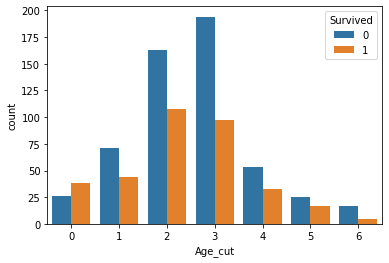

In [49]:
sns.countplot(data=train,x='Age_cut', hue='Survived')

In [50]:
# 티켁 가격도 나이랑 비슷함. 범위로 나누어서 넣어야 함
train['Fare_cut'] = pd.qcut(train.Fare, 4, labels = [1, 2, 3, 4])
train.drop('Fare', axis=1, inplace=True)

test['Fare_cut'] = pd.qcut(test.Fare, 4, labels = [1, 2, 3, 4])
test.drop('Fare', axis=1, inplace=True)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Embarked,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3,Title,Age_cut,Fare_cut
0,1,0,3,male,1,0,A/5 21171,S,False,True,False,False,False,True,0,2,1
1,2,1,1,female,1,0,PC 17599,C,True,False,False,True,False,False,2,3,4
2,3,1,3,female,0,0,STON/O2. 3101282,S,False,True,False,False,False,True,1,2,2
3,4,1,1,female,1,0,113803,S,False,True,False,True,False,False,2,3,4
4,5,0,3,male,0,0,373450,S,False,True,False,False,False,True,0,3,2


In [52]:
# family_size에 동반한 가족의 유무를 넣는다
train['Family_size'] = train.SibSp + train.Parch
train = train.drop(['Ticket', 'SibSp', 'Parch'], axis=1)

# 가족 유무만 남기고 다른건 삭제
# 티켓도 안쓸거니까 삭제
test['Family_size'] = test.SibSp + test.Parch
test = test.drop(['Ticket', 'SibSp', 'Parch'], axis=1)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3,Title,Age_cut,Fare_cut,Family_size
0,1,0,3,male,S,False,True,False,False,False,True,0,2,1,1
1,2,1,1,female,C,True,False,False,True,False,False,2,3,4,1
2,3,1,3,female,S,False,True,False,False,False,True,1,2,2,0
3,4,1,1,female,S,False,True,False,True,False,False,2,3,4,1
4,5,0,3,male,S,False,True,False,False,False,True,0,3,2,0


In [54]:
# Sex와 Embarked의 값을 숫자로 견병
train['Embarked'] = train['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
train['Sex'] = train['Sex'].map({'male' : 0, 'female' : 1})

test['Embarked'] = test['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
test['Sex'] = test['Sex'].map({'male' : 0, 'female' : 1})

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3,Title,Age_cut,Fare_cut,Family_size
0,1,0,3,0,0,False,True,False,False,False,True,0,2,1,1
1,2,1,1,1,1,True,False,False,True,False,False,2,3,4,1
2,3,1,3,1,0,False,True,False,False,False,True,1,2,2,0
3,4,1,1,1,0,False,True,False,True,False,False,2,3,4,1
4,5,0,3,0,0,False,True,False,False,False,True,0,3,2,0


In [56]:
# PassengerId도 삭제
train = train.drop(['PassengerId'], axis=1)

test = test.drop(['PassengerId'], axis=1)

In [57]:
train.head()

,Survived,Pclass,Sex,Embarked,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3,Title,Age_cut,Fare_cut,Family_size
0,0,3,0,0,False,True,False,False,False,True,0,2,1,1
1,1,1,1,1,True,False,False,True,False,False,2,3,4,1
2,1,3,1,0,False,True,False,False,False,True,1,2,2,0
3,1,1,1,0,False,True,False,True,False,False,2,3,4,1
4,0,3,0,0,False,True,False,False,False,True,0,3,2,0


In [58]:
test.head()

,Pclass,Sex,Embarked,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3,Title,Age_cut,Fare_cut,Family_size
0,3,0,2,False,False,True,False,False,True,0,3,1,0
1,3,1,0,False,True,False,False,False,True,2,4,1,1
2,2,0,2,False,False,True,False,True,False,0,6,2,0
3,3,0,0,False,True,False,False,False,True,0,2,2,0
4,3,1,0,False,True,False,False,False,True,2,2,2,2


# 모델 설계 및 학습

In [62]:
feature_names = ['Pclass_1','Pclass_2','Pclass_3','Sex','Embarked','Title','Age_cut','Fare_cut', 'Family_size','Embarked_S','Embarked_Q','Embarked_C']

In [63]:
# 특성을 이용하여 머신러닝의 모델을 만들 데이터를 만들기
x_train = train[feature_names]
x_train.head()

,Pclass_1,Pclass_2,Pclass_3,Sex,Embarked,Title,Age_cut,Fare_cut,Family_size,Embarked_S,Embarked_Q,Embarked_C
0,False,False,True,0,0,0,2,1,1,True,False,False
1,True,False,False,1,1,2,3,4,1,False,False,True
2,False,False,True,1,0,1,2,2,0,True,False,False
3,True,False,False,1,0,2,3,4,1,True,False,False
4,False,False,True,0,0,0,3,2,0,True,False,False


In [64]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass_1     891 non-null    bool    
 1   Pclass_2     891 non-null    bool    
 2   Pclass_3     891 non-null    bool    
 3   Sex          891 non-null    int64   
 4   Embarked     891 non-null    int64   
 5   Title        891 non-null    int64   
 6   Age_cut      891 non-null    category
 7   Fare_cut     891 non-null    category
 8   Family_size  891 non-null    int64   
 9   Embarked_S   891 non-null    bool    
 10  Embarked_Q   891 non-null    bool    
 11  Embarked_C   891 non-null    bool    
dtypes: bool(6), category(2), int64(4)
memory usage: 35.5 KB


In [65]:
x_train.isnull().sum()

Pclass_1       0
Pclass_2       0
Pclass_3       0
Sex            0
Embarked       0
Title          0
Age_cut        0
Fare_cut       0
Family_size    0
Embarked_S     0
Embarked_Q     0
Embarked_C     0
dtype: int64

In [66]:
x_test = test[feature_names]
x_test.head()

,Pclass_1,Pclass_2,Pclass_3,Sex,Embarked,Title,Age_cut,Fare_cut,Family_size,Embarked_S,Embarked_Q,Embarked_C
0,False,False,True,0,2,0,3,1,0,False,True,False
1,False,False,True,1,0,2,4,1,1,True,False,False
2,False,True,False,0,2,0,6,2,0,False,True,False
3,False,False,True,0,0,0,2,2,0,True,False,False
4,False,False,True,1,0,2,2,2,2,True,False,False


In [67]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass_1     418 non-null    bool    
 1   Pclass_2     418 non-null    bool    
 2   Pclass_3     418 non-null    bool    
 3   Sex          418 non-null    int64   
 4   Embarked     418 non-null    int64   
 5   Title        418 non-null    int64   
 6   Age_cut      418 non-null    category
 7   Fare_cut     418 non-null    category
 8   Family_size  418 non-null    int64   
 9   Embarked_S   418 non-null    bool    
 10  Embarked_Q   418 non-null    bool    
 11  Embarked_C   418 non-null    bool    
dtypes: bool(6), category(2), int64(4)
memory usage: 17.0 KB


In [68]:
x_test.isnull().sum()

Pclass_1       0
Pclass_2       0
Pclass_3       0
Sex            0
Embarked       0
Title          0
Age_cut        0
Fare_cut       0
Family_size    0
Embarked_S     0
Embarked_Q     0
Embarked_C     0
dtype: int64

In [69]:
# y값(정답) 만들기
label_name = 'Survived'
y_train = train[label_name]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [70]:
# 데이터 검사
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [71]:
# 모델 만들기
model = RandomForestClassifier(n_estimators = 100)     # 15번 학습시키겠다
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
# 모델을 학습시키기
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
# 예측하기
pridections = model.predict(x_test)
pridections.shape

(418,)

In [74]:
# 정확도 측정
score = cross_val_score(model, x_train, y_train, cv=20, scoring='accuracy')

In [75]:
round(np.mean(score) * 100, 2)

80.82

In [76]:
# 제출용 데이터 만들기
submit = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/gender_submission.csv', index_col = 0)
submit.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [77]:
submit.Survived = pridections
submit.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [78]:
submit.to_csv('C:\\Users\\id272\\LSJ\\noeul\\result2.csv')

In [79]:
# scikit-learn == sklearn
from sklearn.tree  import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 20)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
# 1)fit 머신러닝 알고리즘을 학습 시키는 것 데이터 사이의 패턴을 머신러닝 알고리즘이 스스로 판단
# fit 할때는 train 데이터 predict 할때는 test 데이터
# 2) predict
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
prediction = model.predict(x_test)

print(prediction.shape)
prediction[0:5]

(418,)


array([0, 0, 0, 0, 0], dtype=int64)

In [82]:
submit= pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/gender_submission.csv', index_col = 0)

submit["Survived"] = prediction

print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [83]:
#저장
submit.to_csv("C:\\Users\\id272\\LSJ\\noeul\\result2_decision_tree2.csv")

In [ ]:
# Pclass의 평균 나이를 넣어서 다시 해보기